

# Project: Investigate a Dataset - TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> Dataset used : TMDb movie data This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue contains 21 coulmns id: imdb_id popularity budget revenue original_title cast homepage director tagline keywords overview runtime genres production_companies release_date vote_count vote_average release_year budget_adj revenue_adj. 


### Question(s) for Analysis
>  In the past 10 years which year has the highest and lowest votes on average?



In [1]:
# import statements for all of the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# include a 'magic word' for plotting inline
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 1.6MB/s eta 0:00:01  5% |█▉                              | 583kB 9.5MB/s eta 0:00:02    10% |███▍                            | 1.1MB 11.4MB/s eta 0:00:01    15% |█████                           | 1.6MB 11.2MB/s eta 0:00:01    20% |██████▊                         | 2.2MB 11.5MB/s eta 0:00:01    31% |██████████                      | 3.3MB 11.9MB/s eta 0:00:01    53% |█████████████████▏              | 5.6MB 11.4MB/s eta 0:00:01    64% |████████████████████▌           | 6.7MB 11.4MB/s eta 0:00:01    69% |██████████████████████▎         | 7.3MB 11.4MB/s eta 0:00:01    74% |███████████████████████▉        | 7.8MB 8.0MB/s eta 0:00:01    79% |█████████████████████████▌      | 8.3MB 13.6MB/s eta 0:00:01    84% |███████████████████████████▏    | 8.9MB 23.4MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.4MB/s eta 0:00:01  9% |███                             | 1.3MB 10.2MB/s eta 0:00:02    13% |████▎                         

<a id='wrangling'></a>
## Data Wrangling




In [2]:
# Load data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv("tmdb-movies.csv")

In [3]:
#print few lines    
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#inspect datatypes & missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
#inspect duplicates
sum(df.duplicated())

1


### Data Cleaning

#### The data has :
> duplicated row 

> object type data ( imdb_id ,original_title ,cast , homepage  ,director  ,tagline ,keywords ,overview ,genres         ,production_companies ,release_date ) 

> missing data (imdb_id , cast , homepage , director ,tagline, keywords, overview , genres, production_companies ) 


#### steps of cleaning :
>Removing duplicated rows

>remove the columns that will not be used 

>Convert release_date from object to datetime

>Dealing with missing values( NaN )s: notice that we alreade removed the columns that contain NaN so we will aavoid removing full rows and miss the important data 

In [6]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

Removing duplicated row

In [7]:
#remove duplicates
df.drop_duplicates(inplace= True)

In [8]:
sum(df.duplicated())

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

remove the columns that will not be used

In [10]:
df.drop(labels=["id","imdb_id","homepage"],axis=1,inplace=True)

In [11]:
df.drop(labels=["tagline","overview","original_title"],axis=1,inplace=True)

In [12]:
#Note : these columns contain NaN and keeping them will make us delete the entire row while we will not use them 
# so i dropped them to reduce the deleted rows 

In [13]:
df.drop(labels=["cast","director","keywords","genres","production_companies"],axis=1,inplace=True)

In [14]:
#Remove adjusted budget and revenue and keep only original ones

In [15]:
df.drop(labels=["budget_adj","revenue_adj"],axis=1,inplace=True)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 8 columns):
popularity      10865 non-null float64
budget          10865 non-null int64
revenue         10865 non-null int64
runtime         10865 non-null int64
release_date    10865 non-null object
vote_count      10865 non-null int64
vote_average    10865 non-null float64
release_year    10865 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 763.9+ KB


Convert release_date from object to datetime

In [17]:
#deal with object type
df["release_date"]=pd.to_datetime(df["release_date"])

In [18]:
#sum of rows containing NaN
sum(df.isna().any(axis=1))

0

Dealing with missing values( NaN )s:
-cant replace them with mean because they are strings -> remove them


In [19]:
df.dropna(axis=0, how='any', inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 8 columns):
popularity      10865 non-null float64
budget          10865 non-null int64
revenue         10865 non-null int64
runtime         10865 non-null int64
release_date    10865 non-null datetime64[ns]
vote_count      10865 non-null int64
vote_average    10865 non-null float64
release_year    10865 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 763.9 KB


In [21]:
df.head()

,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,124,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,120,2015-05-13,6185,7.1,2015
2,13.112507,110000000,295238201,119,2015-03-18,2480,6.3,2015
3,11.173104,200000000,2068178225,136,2015-12-15,5292,7.5,2015
4,9.335014,190000000,1506249360,137,2015-04-01,2947,7.3,2015


The following cells are calculating the number of unique values of each variable

In [22]:
df.popularity.unique().size

10814

In [23]:
df.budget.unique().size

557

In [24]:
df.revenue.unique().size

4702

In [25]:
df.	runtime.unique().size

247

In [26]:
df.vote_count.unique().size

1289

In [27]:
df.vote_average.unique().size

72

In [28]:
df.release_year.unique().size

56

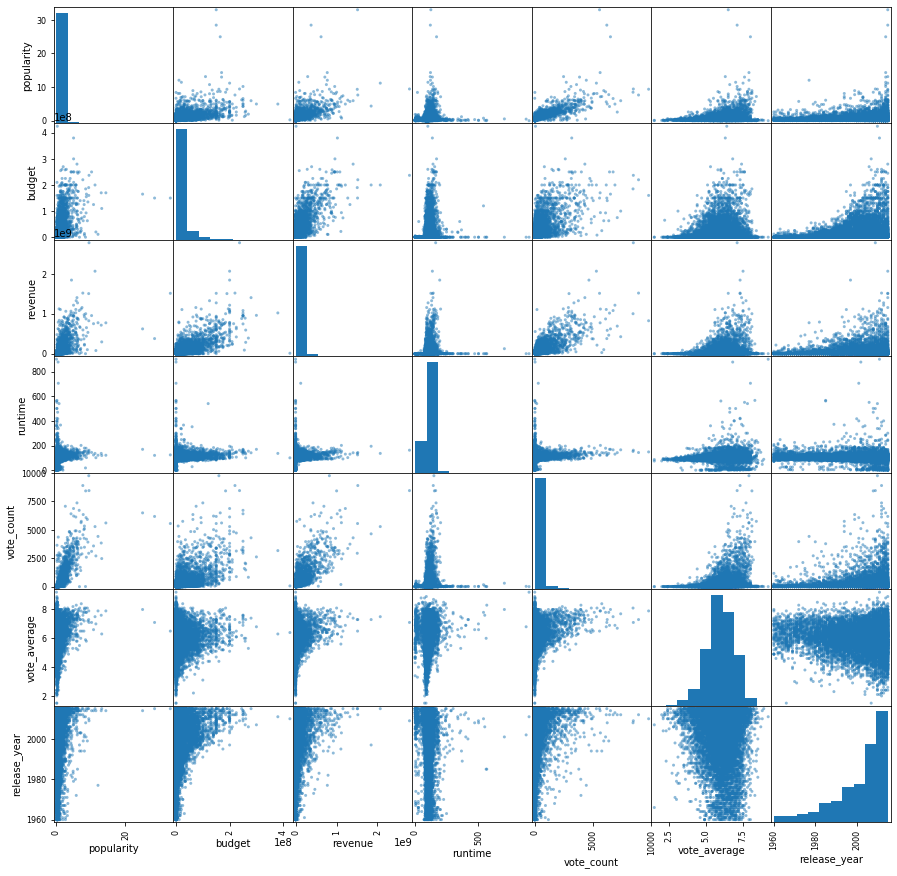

In [29]:
pd.plotting.scatter_matrix(df , figsize=(15,15));

<a id='eda'></a>
## Exploratory Data Analysis




### In the past 10 years which year has the highest and lowest votes on average?

In [30]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


In [31]:
years = np.sort(df.release_year.unique()) #variable holds the unique values of release_year sorted
votes= np.sort(df.vote_average.unique()) #variable holds the unique values of vote_average sorted

In [32]:
#create a dataframe for each release year of the past 10 years
df_2006 = df[df["release_year"]==2006]
df_2007 = df[df["release_year"]==2007]
df_2008 = df[df["release_year"]==2008]
df_2009 = df[df["release_year"]==2009]
df_2010 = df[df["release_year"]==2010]
df_2011 = df[df["release_year"]==2011]
df_2012 = df[df["release_year"]==2012]
df_2013 = df[df["release_year"]==2013]
df_2014 = df[df["release_year"]==2014]
df_2015 = df[df["release_year"]==2015]


Here we devided the 10 years into 2 plots so that they are clearer and to avoid hiding each other 

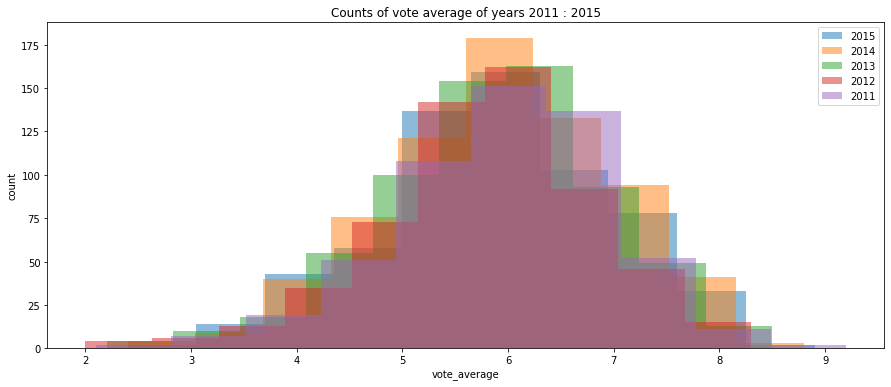

In [33]:
#plot the first 5 years 
fig,ax=plt.subplots(figsize=(15,6))
ax.hist(df_2015["vote_average"],alpha=0.5,label="2015")
ax.hist(df_2014["vote_average"],alpha=0.5,label="2014")
ax.hist(df_2013["vote_average"],alpha=0.5,label="2013")
ax.hist(df_2012["vote_average"],alpha=0.5,label="2012")
ax.hist(df_2011["vote_average"],alpha=0.5,label="2011")
ax.set_xlabel("vote_average")
ax.set_ylabel("count")
ax.set_title("Counts of vote average of years 2011 : 2015")
ax.legend(loc='upper right')
plt.show()

The graph tells us that 2011 has a very high vote average that is reaching the maximum vote_average of 9.2

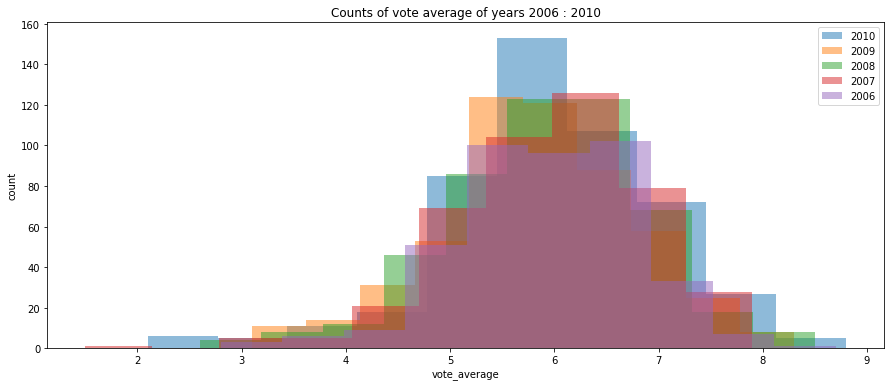

In [34]:
#plot the second five years 
fig,ax=plt.subplots(figsize=(15,6))
ax.hist(df_2010["vote_average"],alpha=0.5,label="2010")
ax.hist(df_2009["vote_average"],alpha=0.5,label="2009")
ax.hist(df_2008["vote_average"],alpha=0.5,label="2008")
ax.hist(df_2007["vote_average"],alpha=0.5,label="2007")
ax.hist(df_2006["vote_average"],alpha=0.5,label="2006")

ax.set_title("Counts of vote average of years 2006 : 2010")
ax.set_xlabel("vote_average")
ax.set_ylabel("count")
ax.legend(loc='upper right')
plt.show()

The graph tells us that 2007 has a very low vote average that is reaching the minimum vote_average of 1.5

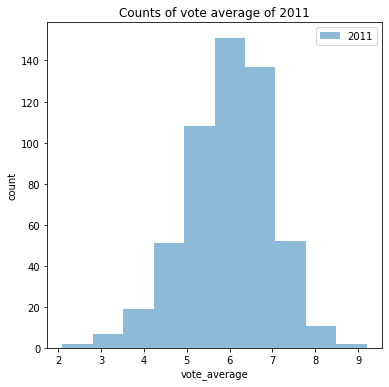

In [35]:
#plotting a histogram for the vote_average of 2011 to show the maximum
fig,ax=plt.subplots(figsize=(6,6))
ax.hist(df_2011["vote_average"],alpha=0.5,label="2011")
ax.set_xlabel("vote_average")
ax.set_ylabel("count")
ax.set_title("Counts of vote average of 2011")
ax.legend(loc='upper right')
plt.show()

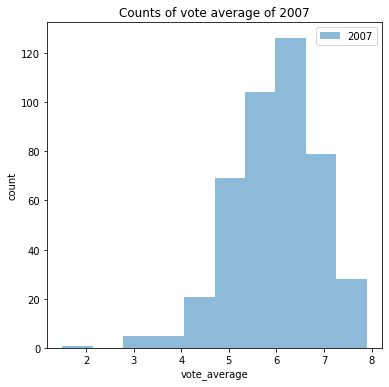

In [36]:
#plotting a histogram for the vote_average of 2007 to show the minimum
fig,ax=plt.subplots(figsize=(6,6))

ax.hist(df_2007["vote_average"],alpha=0.5,label="2007")
ax.set_xlabel("vote_average")
ax.set_ylabel("count")
ax.set_title("Counts of vote average of 2007")
ax.legend(loc='upper right')
plt.show()

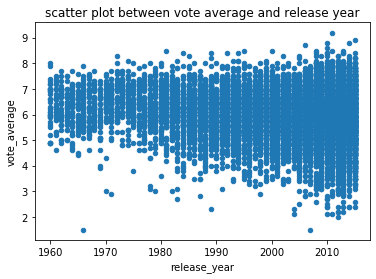

In [37]:
#plot a scatter plot between vote_average and release_year
df.plot(x="release_year",y="vote_average",title = "scatter plot between vote average and release year",kind="scatter")

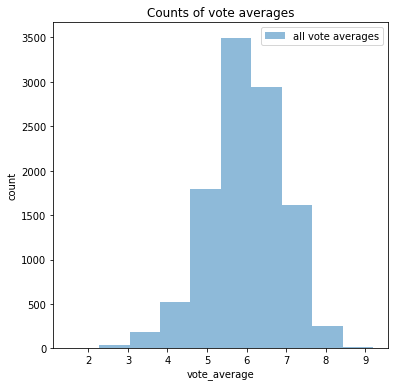

In [38]:
#plot a histogram of all vote averages
fig,ax=plt.subplots(figsize=(6,6))
ax.hist(df["vote_average"],alpha=0.5,label="all vote averages")

ax.set_xlabel("vote_average")
ax.set_ylabel("count")
ax.set_title("Counts of vote averages")
ax.legend(loc='upper right')
plt.show()

Then the vote of : 6 is the most common vote average among the 10 years

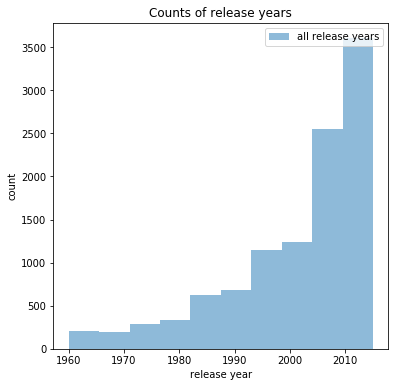

In [39]:
#plot a histogram of all release years
fig,ax=plt.subplots(figsize=(6,6))
ax.hist(df["release_year"],alpha=0.5,label="all release years")

ax.set_xlabel("release year")
ax.set_ylabel("count")
ax.set_title("Counts of release years")
ax.legend(loc='upper right')
plt.show()

the release year of 2010 has the most number of vote averages 

<a id='conclusions'></a>
## Conclusions

  
> at the release_year of 2010 and 2014 :most of the votes was near the mean of all votes which is 5.9

> at the release_year of 2011 the votes was high and reached the maximum value at 9.2

> at the release_year of 2007 the votes was low and reached the minmum value at 1.5

### Limitations
> The missing data of the columns like "original_title" was a limitation because we cant predict the missing value of them , we might replace the missing values with the mode of the values but this may produce inaccurate information




In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0